Check the larger map size for mass  discrepancies

## Large: 200 pixels; 15.0 kpc/pixel
## Orig: 200 pixels, 5.0 kpc/pixel

In [12]:
#import functions from module
import sys
sys.path.append('/Users/fardila/Documents/GitHub/HSC_vs_hydro/')
from functions import *

import numpy as np
import os
import pickle

%matplotlib inline 
%load_ext autoreload 
%autoreload 2

## check file properties

In [21]:
Illustris_file_large = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/galaxies_orig_large.hdf5'
Illustris_file = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/galaxies_orig_11.2.hdf5'


In [3]:
f = h5py.File(Illustris_file_large, 'r')
n_galaxies = len(f['cat_sh_id'])
cat_sh_mstar = np.array(f['cat_sh_mstar'])
map_size = f.attrs['stellar_map_size']
n_pixels = f.attrs['stellar_map_np']
pixel_scale=2 * (map_size/n_pixels)
f.close()

In [4]:
print "number of galaxies: ", n_galaxies
print "map size in pixels: ", n_pixels
print "map size in kpc: ", map_size
print "pixel scals: ", pixel_scale

number of galaxies:  5
map size in pixels:  200
map size in kpc:  1500.0
pixel scals:  15.0


## get masses

In [44]:
illustris_masses_large=[]
illustris_masses=[]

#large
for i in range(n_galaxies):
    
    print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^')
    print('^^^^^^^^GALAXY '+str(i)+'^^^^^^^^^^^^^^')
    print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^')

    try:
        iso, masses_large = get_masses(Illustris_file_large,'Illustris',gal_n=i)
        
    except ValueError:
        iso=-99.99
        masses_large=-99.99


    illustris_masses_large.append(masses_large)


#orig
for i in range(20):
    
    print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^')
    print('^^^^^^^^GALAXY '+str(i)+'^^^^^^^^^^^^^^')
    print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^')

    try:
         iso, masses = get_masses(Illustris_file,'Illustris',gal_n=i)

    except ValueError:
        iso=-99.99
        masses=-99.99


    illustris_masses.append(masses)
    
    
#save as pickles
# pkl_isos = open('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/Illustris_isos.pkl','wb')
# pickle.dump(isos_illustris,pkl_isos)
# pkl_isos.close()

# pkl_masses = open('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/Illustris_masses.pkl','wb')
# pickle.dump(masses_illustris,pkl_masses)
# pkl_masses.close()


^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^GALAXY 0^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
----------------------------------------------------------------------------------------------------
###      galX, galY :  100.0 100.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 250
###      Stage :  3
###      Step :  0.05
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/Illustris_0_xy_cen.fits
###      Input Image   : temp_N2N22.fits
###      Output Binary : /U

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
###     Input background value   :  0.0
###     1-D SBP background value :  15547175.0
###     Current outer background :  15547175.0
----------------------------------------------------------------------------------------------------
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^GALAXY 1^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
----------------------------------------------------------------------------------------------------
###      galX, galY :  100.0 100.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 250
###      Stage :  3
###      Step :  0.05
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
-------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
###     Input background value   :  0.0
###     1-D SBP background value :  34057960.0
###     Current outer background :  34057960.0
----------------------------------------------------------------------------------------------------
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^GALAXY 7^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
----------------------------------------------------------------------------------------------------
###      galX, galY :  100.0 100.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 250
###      Stage :  3
###      Step :  0.05
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
-------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
###     Input background value   :  0.0
###     1-D SBP background value :  3077454.5
###     Current outer background :  3077454.5
----------------------------------------------------------------------------------------------------
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^GALAXY 10^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
----------------------------------------------------------------------------------------------------
###      galX, galY :  100.0 100.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 250
###      Stage :  3
###      Step :  0.05
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
--------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
###     Input background value   :  0.0
###     1-D SBP background value :  1144974.0
###     Current outer background :  1144974.0
----------------------------------------------------------------------------------------------------
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^^^^GALAXY 16^^^^^^^^^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
----------------------------------------------------------------------------------------------------
###      galX, galY :  100.0 100.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 250
###      Stage :  3
###      Step :  0.05
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
--------------------------------------------------------------------------------------------

In [45]:
#keep only top5 catalog mass to compare with large
illustris_masses = sorted(illustris_masses, reverse=True)[:5]

## define masses

### LARGE 

In [46]:
#masses = [m_cat, m_post, m_post_icl, m_1d_10, m_1d_30, m_1d_100, m_2d_10, m_2d_30, m_2d_100, extrap_mass]
illustris_large_m_cat =  np.array([gal[0] for gal in illustris_masses_large])
illustris_large_m_post =  np.array([gal[1] for gal in illustris_masses_large])
illustris_large_m_post_icl =  np.array([gal[2] for gal in illustris_masses_large])
illustris_large_m_1d_30 = np.array([gal[4] for gal in illustris_masses_large])
illustris_large_m_1d_100 = np.array([gal[5] for gal in illustris_masses_large])
illustris_large_m_2d_30 = np.array([gal[7] for gal in illustris_masses_large])
illustris_large_m_2d_100 = np.array([gal[8] for gal in illustris_masses_large])
illustris_large_m_extrap = np.array([gal[9] for gal in illustris_masses_large])



### ORIG

In [47]:
#masses = [m_cat, m_post, m_post_icl, m_1d_10, m_1d_30, m_1d_100, m_2d_10, m_2d_30, m_2d_100, extrap_mass]
illustris_m_cat =  np.array([gal[0] for gal in illustris_masses])
illustris_m_post =  np.array([gal[1] for gal in illustris_masses])
illustris_m_post_icl =  np.array([gal[2] for gal in illustris_masses])
illustris_m_1d_30 = np.array([gal[4] for gal in illustris_masses])
illustris_m_1d_100 = np.array([gal[5] for gal in illustris_masses])
illustris_m_2d_30 = np.array([gal[7] for gal in illustris_masses])
illustris_m_2d_100 = np.array([gal[8] for gal in illustris_masses])
illustris_m_extrap = np.array([gal[9] for gal in illustris_masses])



## plot mass differences vs. catalog mass

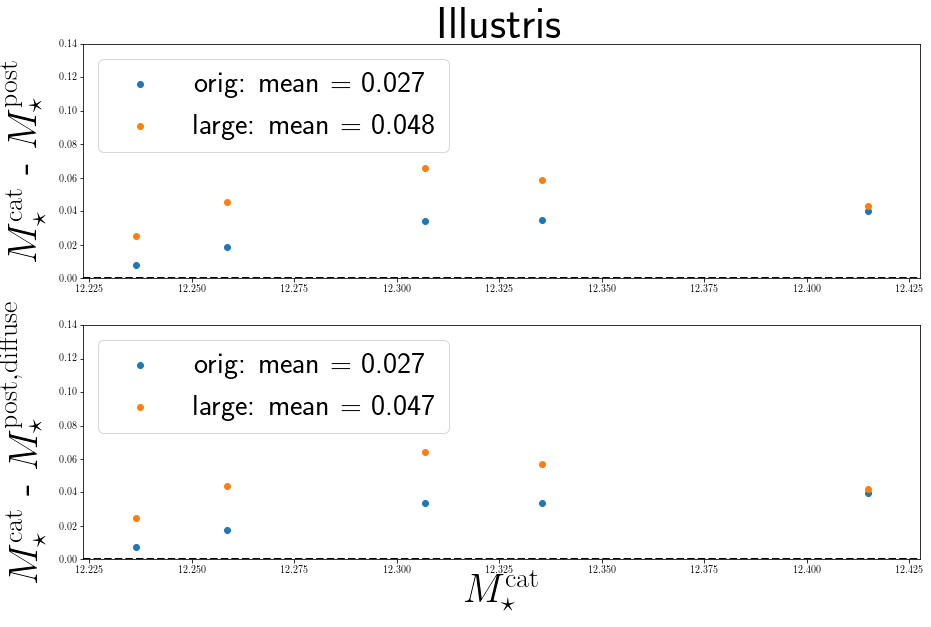

In [58]:
#large
illustris_large_diff_cat_post = illustris_large_m_cat-illustris_large_m_post
illustris_large_diff_cat_post_icl = illustris_large_m_cat-illustris_large_m_post_icl
illustris_large_diff_cat_1d100 = illustris_large_m_cat-illustris_large_m_1d_100
illustris_large_diff_2d_1d_30 = illustris_large_m_2d_30-illustris_large_m_1d_30
illustris_large_diff_cat_1dextrap = illustris_large_m_cat-illustris_large_m_extrap

#orig
illustris_diff_cat_post = illustris_m_cat-illustris_m_post
illustris_diff_cat_post_icl = illustris_m_cat-illustris_m_post_icl
illustris_diff_cat_1d100 = illustris_m_cat-illustris_m_1d_100
illustris_diff_2d_1d_30 = illustris_m_2d_30-illustris_m_1d_30
illustris_diff_cat_1dextrap = illustris_m_cat-illustris_m_extrap


# #fit lines
# xs=np.linspace(11.2,12.5,100)

# illustris_diff_cat_post_params = np.polyfit(illustris_m_cat[illustris_diff_cat_post<100], 
#                                             illustris_diff_cat_post[illustris_diff_cat_post<100],1)
# illustris_diff_cat_post_line = np.poly1d(illustris_diff_cat_post_params)
# ########################################################################
# illustris_diff_cat_post_icl_params = np.polyfit(illustris_m_cat[illustris_diff_cat_post_icl<100], 
#                                                 illustris_diff_cat_post_icl[illustris_diff_cat_post_icl<100], 1)
# illustris_diff_cat_post_icl_line = np.poly1d(illustris_diff_cat_post_icl_params)
# ########################################################################
# illustris_diff_cat_1d100_params = np.polyfit(illustris_m_cat[illustris_diff_cat_1d100<100], 
#                                                 illustris_diff_cat_1d100[illustris_diff_cat_1d100<100], 1)
# illustris_diff_cat_1d100_line = np.poly1d(illustris_diff_cat_1d100_params)
# ########################################################################
# illustris_diff_2d_1d_30_params = np.polyfit(illustris_m_cat[illustris_diff_2d_1d_30<100], 
#                                                 illustris_diff_2d_1d_30[illustris_diff_2d_1d_30<100], 1)
# illustris_diff_2d_1d_30_line = np.poly1d(illustris_diff_2d_1d_30_params)
# ########################################################################
# illustris_diff_cat_1dextrap_params = np.polyfit(illustris_m_cat[illustris_diff_cat_1dextrap<100], 
#                                                 illustris_diff_cat_1dextrap[illustris_diff_cat_1dextrap<100], 1)
# illustris_diff_cat_1dextrap_line = np.poly1d(illustris_diff_cat_1dextrap_params)

#plt.figure(figsize=[15,25])
plt.figure(figsize=[15,25])
ax1=plt.subplot(511)
ax2=plt.subplot(512)
# ax3=plt.subplot(513)
# ax4=plt.subplot(514)
# ax5=plt.subplot(515)


ax1.scatter(illustris_m_cat[illustris_diff_cat_post<100], 
            illustris_diff_cat_post[illustris_diff_cat_post<100], 
            label = 'orig: mean = '+ str(round(np.mean(illustris_diff_cat_post), 3)))
ax1.scatter(illustris_large_m_cat[illustris_large_diff_cat_post<100], 
            illustris_large_diff_cat_post[illustris_large_diff_cat_post<100], 
            label = 'large: mean = '+ str(round(np.mean(illustris_large_diff_cat_post), 3)))
# ax1.plot(xs, illustris_diff_cat_post_line(xs))
ax1.axhline(0,c="k",linewidth=2,linestyle='--')
# ax1.text(12, 0.05,'linear params: ' + str(illustris_diff_cat_post_params), fontsize=15)
ax1.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{post}}$', fontsize=40)

ax2.scatter(illustris_m_cat[illustris_diff_cat_post_icl<100], 
            illustris_diff_cat_post_icl[illustris_diff_cat_post_icl<100], 
            label = 'orig: mean = '+ str(round(np.mean(illustris_diff_cat_post_icl), 3)))
ax2.scatter(illustris_large_m_cat[illustris_large_diff_cat_post_icl<100], 
            illustris_large_diff_cat_post_icl[illustris_large_diff_cat_post_icl<100], 
            label = 'large: mean = '+ str(round(np.mean(illustris_large_diff_cat_post_icl), 3)))
# ax2.plot(xs, illustris_diff_cat_post_icl_line(xs))
ax2.axhline(0,c="k",linewidth=2,linestyle='--')
# ax2.text(12, 0.05,'linear params: ' + str(illustris_diff_cat_post_icl_params), fontsize=15)
ax2.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{post, diffuse}}$ ', fontsize=40)

# ax3.scatter(illustris_m_cat[illustris_diff_cat_1d100<100], illustris_diff_cat_1d100[illustris_diff_cat_1d100<100])
# # ax3.plot(xs, illustris_diff_cat_1d100_line(xs))
# ax3.axhline(0, c="k",linewidth=2, linestyle='--')
# # ax3.text(12, 0.05,'linear params: ' + str(illustris_diff_cat_1d100_params), fontsize=15)
# ax3.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{1d, 100}}$ ', fontsize=40)

# ax4.scatter(illustris_m_cat[illustris_diff_2d_1d_30<100], illustris_diff_2d_1d_30[illustris_diff_2d_1d_30<100])
# # ax4.plot(xs, illustris_diff_2d_1d_30_line(xs))
# ax4.axhline(0,c="k",linewidth=2,linestyle='--')
# # ax4.text(12, 0.05,'linear params: ' + str(illustris_diff_2d_1d_30_params), fontsize=15)
# ax4.set_ylabel(r'$M_{\star}^{\mathrm{2d, 30}}$ - $M_{\star}^{\mathrm{1d, 30}}$ ', fontsize=40)

# ax5.scatter(illustris_m_cat[illustris_diff_cat_1dextrap<100], illustris_diff_cat_1dextrap[illustris_diff_cat_1dextrap<100])
# # ax5.plot(xs, illustris_diff_cat_1dextrap_line(xs))
# ax5.axhline(0,c="k",linewidth=2,linestyle='--')
# # ax5.text(12, 0.05,'linear params: ' + str(illustris_diff_cat_1dextrap_params), fontsize=15)
# ax5.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{1d}}$ ', fontsize=40)




ax2.set_xlabel('$M_{\star}^{\mathrm{cat}}$', fontsize=40)
ax1.set_title('Illustris', fontsize=45)
#plt.tight_layout()

#for ax in [ax1,ax2,ax3,ax4,ax5]:
for ax in [ax1,ax2]:
    ax.set_ylim([0.0,0.14])
    ax.legend(loc='upper left', fontsize=30)
    


pretty strange that the difference is larger in the large maps...

## check with 3rd galaxy M_cat = 12.3

In [62]:
def post_mass(sim_file, gal_n):
    f = h5py.File(sim_file, 'r')
    cat_sh_mstar = np.array(f['cat_sh_mstar'])

    try:
        map_stars = np.array(f['map_stars'])
    except:
        map_stars_insitu = np.array(f['map_stars_insitu'])
        map_stars_exsitu = np.array(f['map_stars_exsitu'])
        map_stars = map_stars_exsitu + map_stars_insitu

    map_size = f.attrs['stellar_map_size']
    n_pixels = f.attrs['stellar_map_np']

    pixel_scale=2 * (map_size/n_pixels)
    f.close()

    #make maps
    img_cen = map_stars[gal_n, 0, 1] * (pixel_scale ** 2) # Central
    img_sat = map_stars[gal_n, 1, 1] * (pixel_scale ** 2) # Satellites
    img_icl = map_stars[gal_n, 2, 1] * (pixel_scale ** 2) # Diffuse
    img_cen_sat = (img_cen + img_sat)           # Central + Satellites
    img_cen_icl = (img_cen + img_icl)           # Central + Satellites
    img_all = (img_cen + img_sat + img_icl)           # Central + Satellites + Diffuse

    #convert the image into unit of stellar mass instead of mass density
    m_cat = np.log10(cat_sh_mstar[gal_n])
    m_post = np.log10(np.sum(img_cen))
    
    return m_cat, m_post

In [63]:
post_mass(Illustris_file,3)

(12.306992548357814, 12.272653549712267)

In [65]:
post_mass(Illustris_file_large,2)

(12.306992548357814, 12.241214114223892)